In [27]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [2]:
def pil2np(img):
  '''
  Convert PIL image to numpy array

  Inputs:
    img : PIL image
      Original image in PIL format

  Outputs:
    new_img : np.ndarray
      Original image in np.ndarray format
  '''
  return np.array(img).astype(int)

def np2pil(img):
  '''
  Convert numpy array to PIL image

  Inputs:
    img : np.ndarray
      Original image in np.ndarray format

  Outputs:
    new_img : PIL image
      Original image in PIL format
  '''
  return Image.fromarray(img.astype('uint8'))

def show_image(img, is_gray=False):
  '''
  Show image on screen
  '''
  if is_gray:
    plt.imshow(img, cmap=plt.get_cmap('gray'))
  else:
    plt.imshow(img)
  plt.show()

def compare_images(original_img, new_img, title="", is_gray=False):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
  fig.suptitle(title, fontsize=16)
  ax1.imshow(original_img)
  ax1.set_title("Before")
  if is_gray:
    ax2.imshow(new_img, cmap=plt.get_cmap('gray'))
  else:
    ax2.imshow(new_img)
  ax2.set_title("After")
  plt.show()

**Change brightness**

In [3]:
def change_brightness(img, amount):
  '''
  Change brightness of image by a specific amount

  Inputs:
    img : np.ndarray
      Original image in ndarray format
    amount : int
      Amount of brightness you want to change [-255, 255]


  Outputs:
    new_img : np.ndarray
      Image after changing it's brightness
  '''
  new_img = np.clip(img + amount, 0, 255)
  return new_img

**Change contrast**

In [4]:
def change_contrast(img, amount):
  '''
  Change contrast of image by a specific amount

  Inputs:
    img : np.ndarray
      Original image in ndarray format
    amount : int
      Amount of contrast you want to change [-255, 255]


  Outputs:
    new_img : np.ndarray
      Image after changing it's contrast
  '''
  # https://www.dfstudios.co.uk/articles/programming/image-programming-algorithms/image-processing-algorithms-part-5-contrast-adjustment/
  amount = np.clip(amount, -255, 255)
  factor = (259 * (amount + 255)) / (255 * (259 - amount))
  new_img = factor * (img - 128) + 128
  new_img = np.clip(new_img.astype(int), 0, 255)
  return new_img

**Flipping image**

In [5]:
def flip_image(img, axis=0):
  '''
  Change contrast of image by a specific amount

  Inputs:
    img : np.ndarray
      Original image in ndarray format
    axis : int
      Axis to flip the image (0 for vertical, 1 for horizontal)

  Outputs:
    new_img : np.ndarray
      Image after flipping
  '''
  return img[:, ::-1] if axis else img[::-1]

**RGB to grayscale**

In [6]:
def rgb2gray(img):
  '''
  Convert image from rgb to grayscale image

  Inputs:
    img : np.ndarray
      Original image in ndarray format

  Outputs:
    new_img : np.ndarray
      Image after being converted into grayscale
  '''
  return np.dot(img,  [0.2989, 0.5870, 0.1140])

**RGB to Sepia**

In [7]:
def rgb2sebia(img):
  '''
  Convert image from rgb to sebia image

  Inputs:
    img : np.ndarray
      Original image in ndarray format

  Outputs:
    new_img : np.ndarray
      Image after being converted into sebia
  '''
  # https://dyclassroom.com/image-processing-project/how-to-convert-a-color-image-into-sepia-image
  tr = np.dot(img,  [0.393, 0.769, 0.189])
  tg = np.dot(img,  [0.349, 0.686, 0.168])
  tb = np.dot(img,  [0.272, 0.534, 0.131])
  new_img = np.clip(np.dstack((tr, tg, tb)), 0, 255).astype(int)
  return new_img

**Blur image**

In [8]:
def blur_image(img):
  '''
  Blur image using box blur

  Inputs:
    img : np.ndarray
      Original image in ndarray format

  Outputs:
    new_img : np.ndarray
      Image after being blurred
  '''
  # https://en.wikipedia.org/wiki/Kernel_(image_processing)
  kernel = (1 / 9) * np.ones((3, 3))
  if kernel.ndim == 2:
    kernel = np.reshape(kernel, kernel.shape + (1,))

  kernel_height, kernel_width = kernel.shape[:2]
  pad_height, pad_width,  = kernel_height // 2, kernel_width // 2
  img_h, img_w = img.shape[:2]

  padded_img = np.pad(img, [(pad_height, pad_height), (pad_width, pad_width), (0, 0)], mode='wrap')
  new_img = np.zeros(img.shape)

  for y in range(img_h):
    for x in range(img_w):
      window = padded_img[y: y + kernel_height, x: x + kernel_width]
      new_pixel = np.sum(window * kernel, axis=(0, 1))
      new_img[y][x] = new_pixel

  return new_img.astype(int)

**Sharpen Image**

In [9]:
def sharpen_image(img):
  '''
  Sharpen image

  Inputs:
    img : np.ndarray
      Original image in ndarray format

  Outputs:
    new_img : np.ndarray
      Image after being sharpened
  '''
  # https://en.wikipedia.org/wiki/Kernel_(image_processing)
  kernel = np.array([
      [0,-1, 0],
      [-1, 5, -1],
      [0, -1, 0]
  ])
  if kernel.ndim == 2:
    kernel = np.reshape(kernel, kernel.shape + (1,))

  kernel_height, kernel_width = kernel.shape[:2]
  pad_height, pad_width,  = kernel_height // 2, kernel_width // 2
  img_h, img_w = img.shape[:2]

  padded_img = np.pad(img, [(pad_height, pad_height), (pad_width, pad_width), (0, 0)], mode='wrap')
  new_img = np.zeros(img.shape)
  for y in range(img_h):
     for x in range(img_w):
      window = padded_img[y: y + kernel_height, x: x + kernel_width]
      new_pixel = np.sum(window * kernel, axis=(0, 1))
      new_img[y][x] = new_pixel
  return np.clip(new_img.astype(int), 0, 255)

**Cropping Image**

In [10]:
def crop_image(img, w):
  '''
  Crop image from center

  Inputs:
    img : np.ndarray
      Original image in ndarray format
    w: int
      New image width
  Outputs:
    new_img : np.ndarray
      Image after being crop
  '''
  # https://en.wikipedia.org/wiki/Kernel_(image_processing)
  center = (img.shape[0] // 2, img.shape[1] // 2)
  r = w // 2
  new_img = img[center[0] - r : center[0] + r, center[1] - r : center[1] + r]
  return new_img

**Circle Masking**

In [11]:
def circular_mask(img):
  '''
  Apply circular mask on image

  Inputs:
    img : np.ndarray
      Original image in ndarray format
  Outputs:
    new_img : np.ndarray
      Image after being masked
  '''
  h, w = img.shape[:2]
  center = (h // 2, w// 2)
  radius = min(h // 2, w // 2)
  y, x = np.ogrid[:h,:w]

  x -= center[1]
  y -= center[0]

  f = y ** 2 + x ** 2
  new_img = np.array(img)
  new_img[f >= radius ** 2] = [0, 0, 0]
  return new_img

**Ellipse Masking**

In [12]:
def elliptic_mask(img):
  '''
  Apply elliptic mask on image

  Inputs:
    img : np.ndarray
      Original image in ndarray format
  Outputs:
    new_img : np.ndarray
      Image after being masked
  '''
  h, w = img.shape[:2]
  center = (h // 2, w// 2)
  r = min(h // 2, w // 2)

  y, x = np.ogrid[:h,:w]

  x -= center[1]
  y -= center[0]

  a = r * np.sqrt(6) / 2
  b = r * np.sqrt(2) / 2
  lhs = 2 * (a * b) ** 2

  f1 = (a**2 + b**2) * (x**2 + y**2) + 2 * (b**2 - a**2) * x * y
  a, b = b, a
  f2 = (a**2 + b**2) * (x**2 + y**2) + 2 * (b**2 - a**2) * x * y

  new_img = np.array(img)
  new_img[(f1 >= lhs) * (f2 >= lhs)] = [0, 0, 0]
  return new_img

**Helper functions**

In [23]:
def helper_brightness(img, file_name):
  amount = np.clip(int(input('Brightness amount [-255, 255]: ')), -255, 255)
  new_image = change_brightness(img, amount)

  compare_images(img, new_image, 'Change Brightness')
  out_name = file_name.rsplit('.', 1)[0] + f'_brightness_{amount}.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

def helper_contrast(img, file_name):
  amount = np.clip(int(input('Contrast amount [-255, 255]: ')), -255, 255)
  new_image = change_contrast(img, amount)

  compare_images(img, new_image, 'Change Contrast')
  out_name = file_name.rsplit('.', 1)[0] + f'_contrast_{amount}.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

def helper_flip(img, file_name):
  new_image = flip_image(img)
  compare_images(img, new_image, 'Vertical Flip')
  out_name = file_name.rsplit('.', 1)[0] + f'_flip_vertical.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

  new_image = flip_image(img, 1)
  compare_images(img, new_image, 'Horizontal Flip')
  out_name = file_name.rsplit('.', 1)[0] + f'_flip_horizontal.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

def helper_gray_sebia(img, file_name):
  new_image = rgb2gray(img)
  compare_images(img, new_image, 'RGB to Grayscale', is_gray=True)
  out_name = file_name.rsplit('.', 1)[0] + f'_gray.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

  new_image = rgb2sebia(img)
  compare_images(img, new_image, 'RGB to Sebia')
  out_name = file_name.rsplit('.', 1)[0] + f'_sebia.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

def helper_blur_sharpen(img, file_name):
  new_image = blur_image(img)
  compare_images(img, new_image, 'Blurring Image')
  out_name = file_name.rsplit('.', 1)[0] + f'_blur.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

  new_image = sharpen_image(img)
  compare_images(img, new_image, 'Sharpening Image')
  out_name = file_name.rsplit('.', 1)[0] + f'_sharpen.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

def helper_crop(img, file_name):
  max_size = min(img.shape[:2])
  size = np.clip(int(input(f'Cropped size [0, {max_size}]: ')), 0, max_size)
  new_image = crop_image(img, size)
  compare_images(img, new_image, 'Cropping Image')
  out_name = file_name.rsplit('.', 1)[0] + f'_crop_{size}.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

def helper_circle(img, file_name):
  new_image = circular_mask(img)
  compare_images(img, new_image, 'Circular Mask Image')
  out_name = file_name.rsplit('.', 1)[0] + f'_circle.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")


def helper_ellipse(img, file_name):
  new_image = elliptic_mask(img)
  compare_images(img, new_image, 'Elliptic Mask Image')
  out_name = file_name.rsplit('.', 1)[0] + f'_ellipse.png'
  np2pil(new_image).save(out_name)
  print(f"Modified image saved at {out_name}")

**Main function**

In [31]:
def main():
  file_name = input("Enter file name: ")

  img = pil2np(Image.open(file_name))

  print('Options: ')
  print('0/ All')
  print('1/ Change brightness')
  print('2/ Change contrast')
  print('3/ Flip horizontally and vertically')
  print('4/ Convert to gray and sebia')
  print('5/ Blur and sharpen')
  print('6/ Crop image')
  print('7/ Circle mask')
  print('8/ Ellipse mask')
  choice = input("Your choice: ")

  output_path = f'./output_{file_name.rsplit(".", 1)[0]}'
  if not os.path.isdir(output_path):
    os.makedirs(output_path)

  output_path += f'/{file_name}'
  if choice == '0':
    helper_brightness(img, output_path)
    helper_contrast(img, output_path)
    helper_flip(img, output_path)
    helper_gray_sebia(img, output_path)
    helper_blur_sharpen(img, output_path)
    helper_crop(img, output_path)
    helper_circle(img, output_path)
    helper_ellipse(img, output_path)
  elif choice == '1':
    helper_brightness(img, output_path)
  elif choice == '2':
    helper_contrast(img, output_path)
  elif choice == '3':
    helper_flip(img, output_path)
  elif choice == '4':
    helper_gray_sebia(img, output_path)
  elif choice == '5':
    helper_blur_sharpen(img, output_path)
  elif choice == '6':
    helper_crop(img, output_path)
  elif choice == '7':
    helper_circle(img, output_path)
  elif choice == '8':
    helper_ellipse(img, output_path)
  else:
    print("Invalid choice!")

Options: 
0/ All
1/ Change brightness
2/ Change contrast
3/ Flip horizontally and vertically
4/ Convert to gray and sebia
5/ Blur and sharpen
6/ Crop image
7/ Circle mask
8/ Ellipse mask


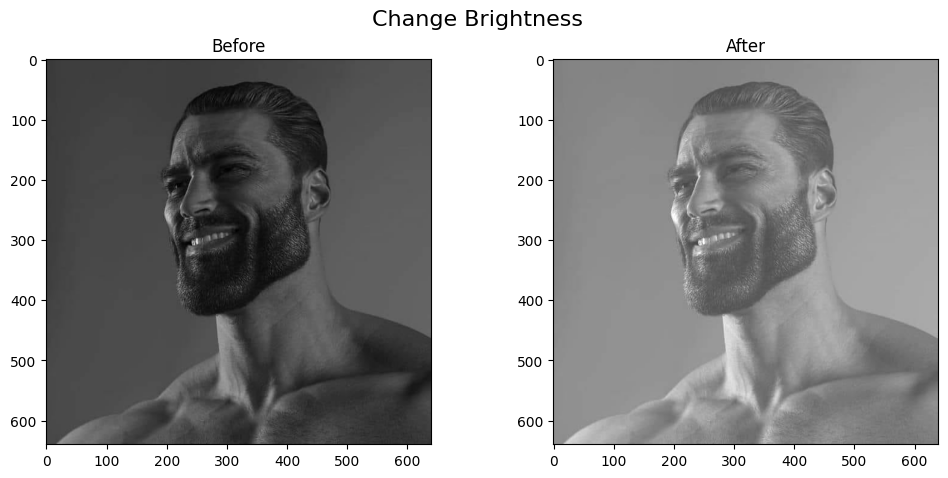

Modified image saved at ./output_chad/chad_brightness_70.png


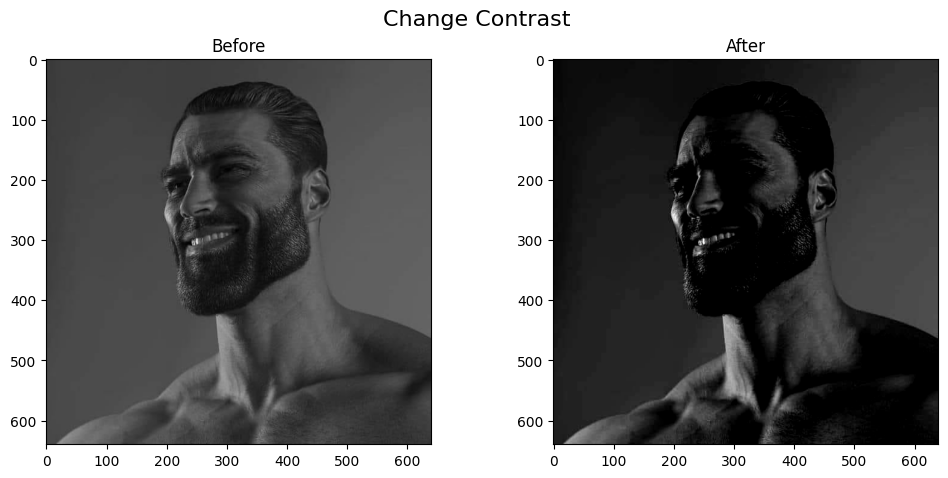

Modified image saved at ./output_chad/chad_contrast_70.png


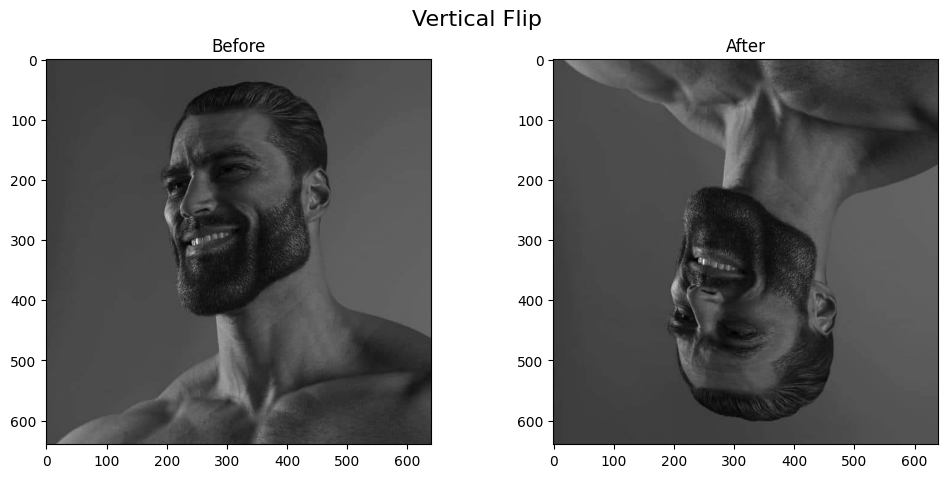

Modified image saved at ./output_chad/chad_flip_vertical.png


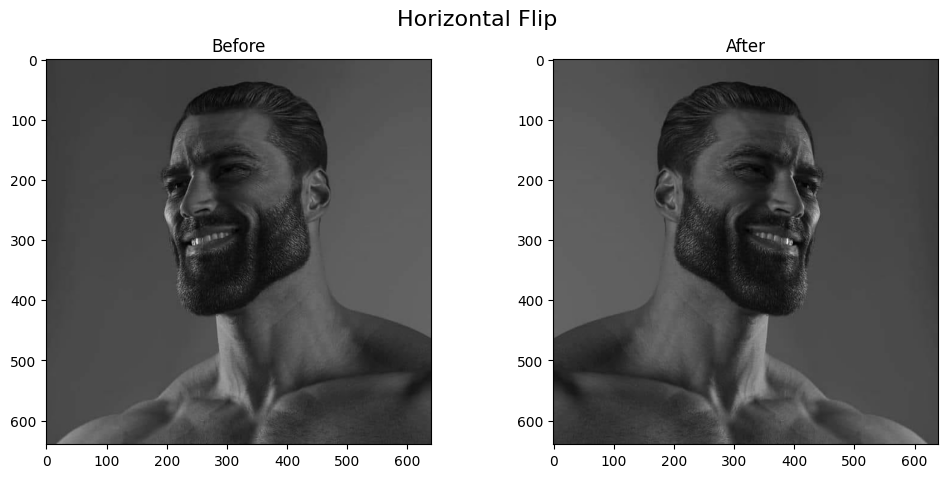

Modified image saved at ./output_chad/chad_flip_horizontal.png


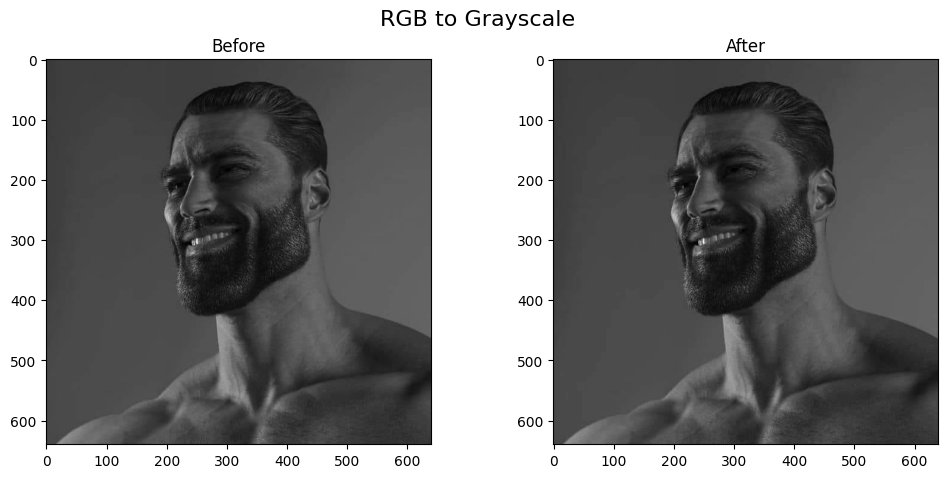

Modified image saved at ./output_chad/chad_gray.png


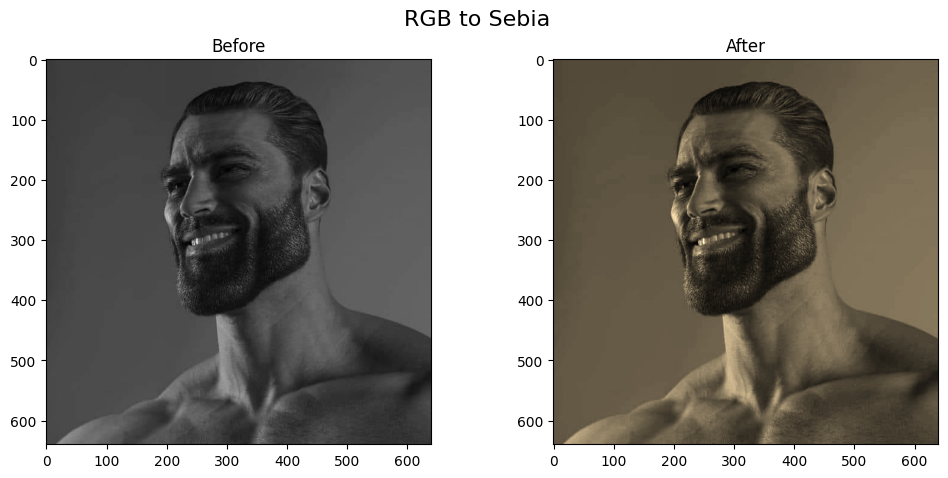

Modified image saved at ./output_chad/chad_sebia.png


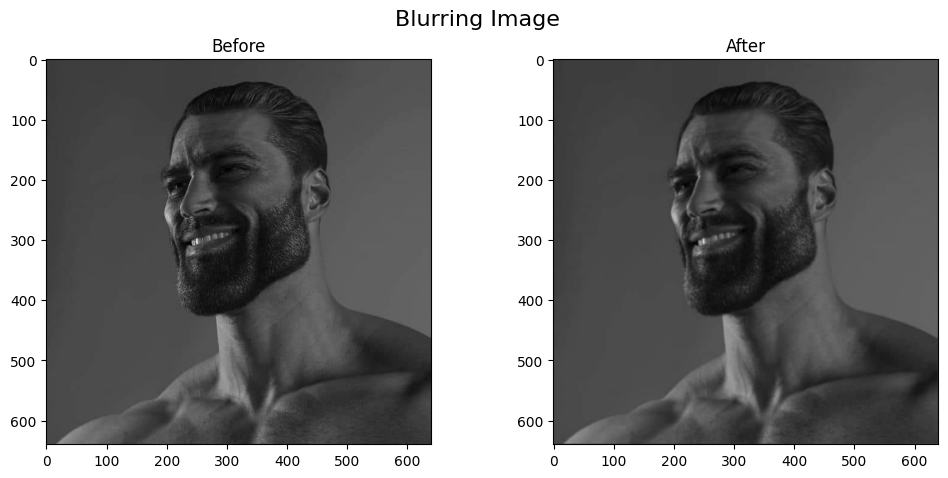

Modified image saved at ./output_chad/chad_blur.png


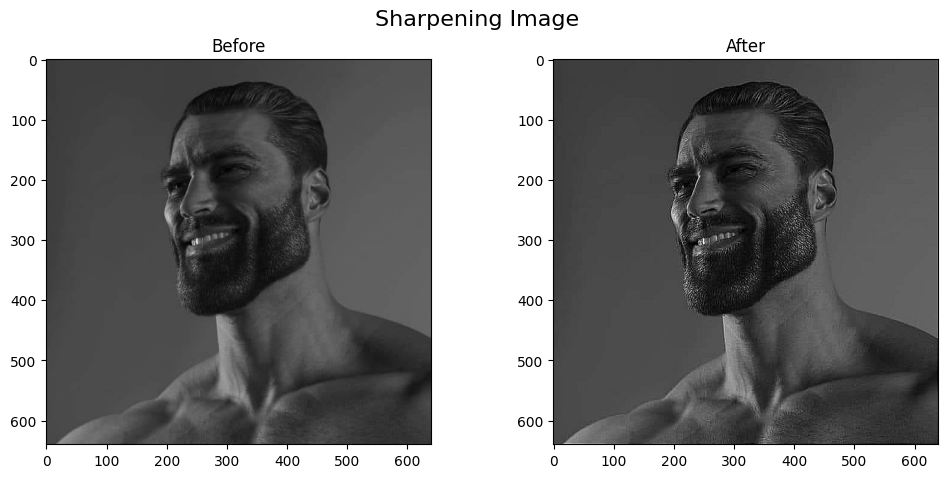

Modified image saved at ./output_chad/chad_sharpen.png


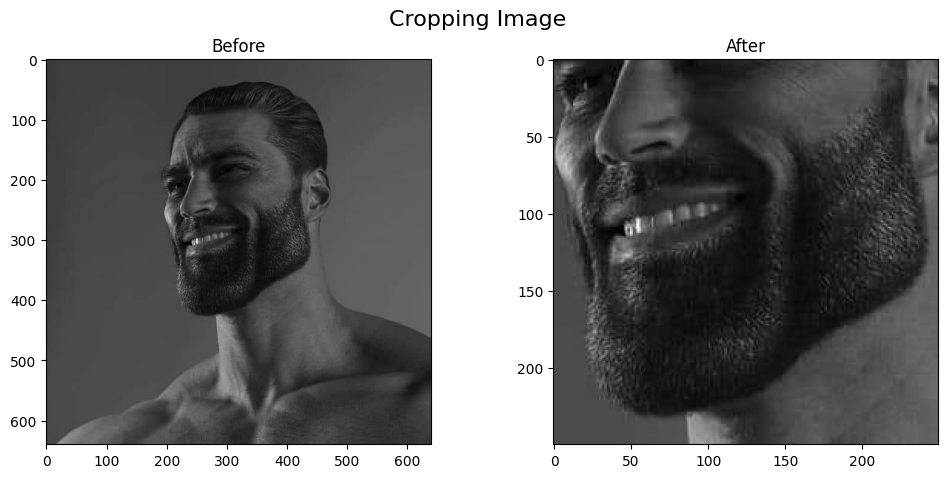

Modified image saved at ./output_chad/chad_crop_250.png


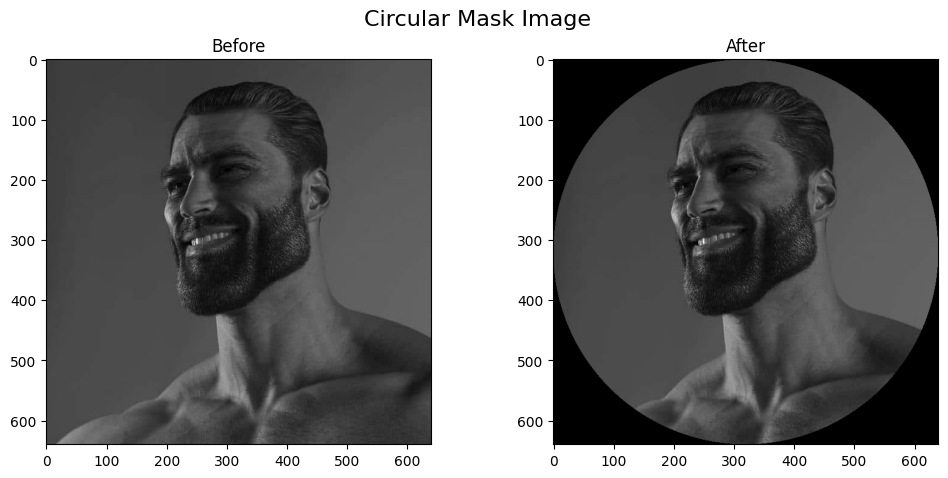

Modified image saved at ./output_chad/chad_circle.png


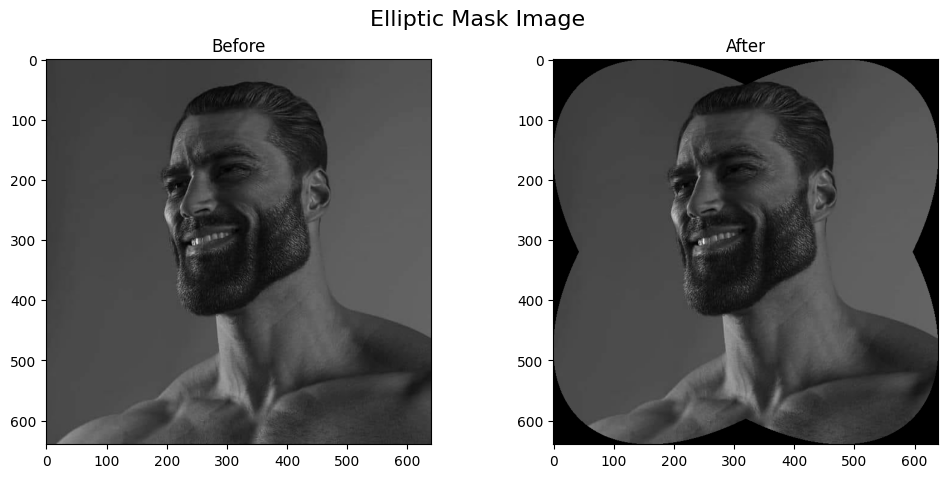

Modified image saved at ./output_chad/chad_ellipse.png


In [36]:
main()